### ***Relatório 3***
**Nome: Eduardo Schwantz**

**Mátricula: 20200683**

In [ ]:
import numpy as np

#**Métodos**

###**Lagrange**

In [ ]:
def lagrange_interpolation(n, x_values, y_values, x):
    result = 0.0

    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term

    return result

###**Newton**

In [ ]:
def calcular_diferencas_divididas(n, x_values, y_values):
    diferencas = y_values.copy()

    for i in range(1, n):
        for j in range(n - 1, i - 1, -1):
            diferencas[j] = (diferencas[j] - diferencas[j - 1]) / (x_values[j] - x_values[j - i])

    return diferencas

def interpolar_newton(n, x_values, y_values, x_interpolate):
    diferencas = calcular_diferencas_divididas(n, x_values, y_values)
    interpolado = diferencas[0]
    produtorio = 1

    for i in range(1, n):
        produtorio *= (x_interpolate - x_values[i - 1])
        interpolado += diferencas[i] * produtorio

    return interpolado


###**Spline**

In [ ]:
def cubic_spline_interpolation(x_values, y_values, x_interpolate):
    n = len(x_values) - 1

    h = np.diff(x_values)
    delta_y = np.diff(y_values)

    alpha = np.zeros(n+1)
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (delta_y[i] / h[i] - delta_y[i-1] / h[i-1])

    l = np.zeros(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)

    l[0] = 1.0
    mu[0] = 0.0
    z[0] = 0.0

    for i in range(1, n):
        l[i] = 2 * (x_values[i+1] - x_values[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    l[n] = 1.0
    z[n] = 0.0
    c = np.zeros(n+1)
    b = np.zeros(n)
    d = np.zeros(n+1)

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = delta_y[j] / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])

    for i in range(n):
        if x_values[i] <= x_interpolate <= x_values[i+1]:
            interpolated_value = (
                y_values[i] +
                b[i] * (x_interpolate - x_values[i]) +
                c[i] * (x_interpolate - x_values[i])**2 +
                d[i] * (x_interpolate - x_values[i])**3
            )
            break

    return interpolated_value

###**Métodos dos Mínimos Quadrados**

In [ ]:
def mmq(x, y, dim):
  grau = dim
  # Criar vetores X e Y
  X, Y = x, y;
  pontos = len(x)

  # cria vetores h
  H = np.zeros((grau+1, pontos))
  for i in range(len(H)):
    for j in range(len(H[0])):
      H[i][j] = pow(X[j], i)

  # Montar o sistema Ax = b
  A = np.zeros((grau+1, grau+1))
  b = np.zeros(grau+1)

  for i in range(len(A)):
    for j in range(len(A)):
      A[i][j] = H[i].dot(H[j])
    b[i] = H[i].dot(Y)

  # Resolver o sistema Ax = b
  x = np.linalg.solve(A,b)
  # Retorna os coeficientes
  return x

### **Questão 1**


A tabela abaixo apresenta a população dos Estados Unidos (em milhões) de 1940 a 1980.
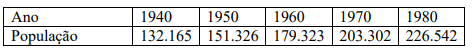

Usando interpolação de Newton, construa o polinômio interpolador de grau 4 para estimar a população no ano 1965

In [ ]:

x_values = [1940, 1950, 1960, 1970, 1980]
y_values =[132165, 151326, 179323, 203302, 226542]
x_interpolate = 1965
n = 5
print(f"A população estimada para o ano de 1965 utilizando o método de Newton é: {interpolar_newton(n, x_values, y_values, x_interpolate):.0f}")

A população estimada para o ano de 1965 utilizando o método de Newton é: 191988


### **Questão 2**

A tabela abaixo apresenta a distância percorrida por um carro em diversos momentos.
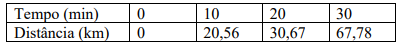

Usando interpolação Lagrange, determine a distância percorrida 15,6 minutos depois da partida.

In [ ]:
x_values = [0, 10, 20, 30]
y_values =[0, 20.56, 30.67, 67.78]
x_interpolate = 15.6
n = 4
print(f"A distância percorrida no minuto 15.6\nLangrange: {lagrange_interpolation(n, x_values, y_values, x_interpolate):.2f} km\nNewton: {interpolar_newton(n, x_values, y_values, x_interpolate):.2f} km")


A distância percorrida no minuto 15.6
Langrange: 25.11 km
Newton: 25.11 km


### **Questão 3**

Seja a função de distribuição de probabilidade normal padrão definida por:

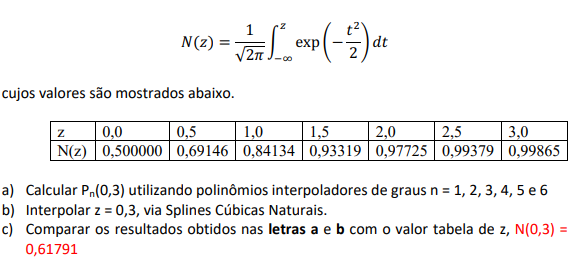

In [ ]:
x_values = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y_values =[0.500000, 0.69146, 0.84134, 0.93319, 0.97725, 0.99379, 0.99865]
x_interpolate = 0.3
print("Resultado exato para 0.3 é 0.61791")
print("a)\n")
for i in range (2, 8):
  print(f"Grau {i-1} Lagrange: {round(lagrange_interpolation(i, x_values, y_values, x_interpolate), 5)}")
  print(f"Grau {i-1} Newton  : {round(interpolar_newton(i, x_values, y_values, x_interpolate), 5)}")

print("\nb)\n")
print(f"Spline: {x_interpolate}: {round(cubic_spline_interpolation(x_values, y_values, x_interpolate), 5)}")

Resultado exato para 0.3 é 0.61791
a)

Grau 1 Lagrange: 0.61488
Grau 1 Newton  : 0.61488
Grau 2 Lagrange: 0.61987
Grau 2 Newton  : 0.61987
Grau 3 Lagrange: 0.61894
Grau 3 Newton  : 0.61894
Grau 4 Lagrange: 0.61805
Grau 4 Newton  : 0.61805
Grau 5 Lagrange: 0.61767
Grau 5 Newton  : 0.61767
Grau 6 Lagrange: 0.61763
Grau 6 Newton  : 0.61763

b)

Spline: 0.3: 0.62084


c) Resposta:
para o grau 1 dos métodos interpoladores (newton e lagrange), os resultados foram o mais erroneos ao resultado exato (0,61791), onde foi encontrado 0,61488.
Já para os graus 2 a 6, os resultados foram muito próximos, mais exato após o grau 4, foram muito proximos, diferenças muito pequenas na 4 casa decimal.
Utilizando o métodos da Spine Cúbica, obtivemos o resultado mais distante do exato, indicando que talvez não seja o método ideal a ser utilizado.

### **Questão 4**

A condutividade térmica do alumínio (6063-T5) foi medida em função da temperatura, e os resultados são mostrados na tabela a seguir:

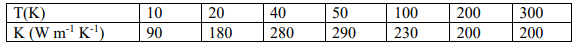
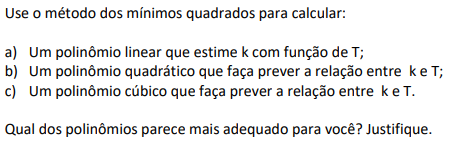

In [ ]:
x_values = [10, 20, 40, 50, 100, 200, 300]
y_values = [90, 180, 280, 290, 230, 200, 200]

print("--- MMQ Primeiro Grau ---")
mmqResult = mmq(x_values, y_values, 1)
print(f"Equation -> {mmqResult[1]} * x + {mmqResult[0]}")
print("\n--- MMQ Segundo Grau ---")
mmqResult = mmq(x_values, y_values, 2)
print(f"Equation -> {mmqResult[2]} * x ** 2 + {mmqResult[1]} * x + {mmqResult[0]}")
print("\n--- MMQ Terceiro Grau ---")
mmqResult = mmq(x_values, y_values, 3)
print(f"Equation -> {mmqResult[3]} * x ** 3 + {mmqResult[2]} * x ** 2 + {mmqResult[1]} * x + {mmqResult[0]}")

--- MMQ Primeiro Grau ---
Equation -> 0.028351559335763655 * x + 207.08383961117858

--- MMQ Segundo Grau ---
Equation -> -0.0037722701439515667 * x ** 2 + 1.168695531527392 * x + 167.71564001652493

--- MMQ Terceiro Grau ---
Equation -> 7.647246640641633e-05 * x ** 3 + -0.0389954514235243 * x ** 2 + 5.219232493199486 * x + 83.24922025121859


a escolha do polinômio depende da complexidade do problema que queremos resolver, para mim nesse caso, como queremos um resultado o mais próximo do exato, escolheria a cúbica, já que por querermos o valor exato, pagariamos o preço da complexidade para termos o resultado mais exato.